In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pyresample as pyr
from pyresample import kd_tree, geometry

In [3]:
lons = np.linspace(-55, -21, 100)
lons

array([-55.        , -54.65656566, -54.31313131, -53.96969697,
       -53.62626263, -53.28282828, -52.93939394, -52.5959596 ,
       -52.25252525, -51.90909091, -51.56565657, -51.22222222,
       -50.87878788, -50.53535354, -50.19191919, -49.84848485,
       -49.50505051, -49.16161616, -48.81818182, -48.47474747,
       -48.13131313, -47.78787879, -47.44444444, -47.1010101 ,
       -46.75757576, -46.41414141, -46.07070707, -45.72727273,
       -45.38383838, -45.04040404, -44.6969697 , -44.35353535,
       -44.01010101, -43.66666667, -43.32323232, -42.97979798,
       -42.63636364, -42.29292929, -41.94949495, -41.60606061,
       -41.26262626, -40.91919192, -40.57575758, -40.23232323,
       -39.88888889, -39.54545455, -39.2020202 , -38.85858586,
       -38.51515152, -38.17171717, -37.82828283, -37.48484848,
       -37.14141414, -36.7979798 , -36.45454545, -36.11111111,
       -35.76767677, -35.42424242, -35.08080808, -34.73737374,
       -34.39393939, -34.05050505, -33.70707071, -33.36

In [4]:
lats = np.linspace(71, 68, 100)
lats

array([71.        , 70.96969697, 70.93939394, 70.90909091, 70.87878788,
       70.84848485, 70.81818182, 70.78787879, 70.75757576, 70.72727273,
       70.6969697 , 70.66666667, 70.63636364, 70.60606061, 70.57575758,
       70.54545455, 70.51515152, 70.48484848, 70.45454545, 70.42424242,
       70.39393939, 70.36363636, 70.33333333, 70.3030303 , 70.27272727,
       70.24242424, 70.21212121, 70.18181818, 70.15151515, 70.12121212,
       70.09090909, 70.06060606, 70.03030303, 70.        , 69.96969697,
       69.93939394, 69.90909091, 69.87878788, 69.84848485, 69.81818182,
       69.78787879, 69.75757576, 69.72727273, 69.6969697 , 69.66666667,
       69.63636364, 69.60606061, 69.57575758, 69.54545455, 69.51515152,
       69.48484848, 69.45454545, 69.42424242, 69.39393939, 69.36363636,
       69.33333333, 69.3030303 , 69.27272727, 69.24242424, 69.21212121,
       69.18181818, 69.15151515, 69.12121212, 69.09090909, 69.06060606,
       69.03030303, 69.        , 68.96969697, 68.93939394, 68.90

In [5]:
lonslons, latslats = np.meshgrid(lons, lats)
lonslons, latslats

(array([[-55.        , -54.65656566, -54.31313131, ..., -21.68686869,
         -21.34343434, -21.        ],
        [-55.        , -54.65656566, -54.31313131, ..., -21.68686869,
         -21.34343434, -21.        ],
        [-55.        , -54.65656566, -54.31313131, ..., -21.68686869,
         -21.34343434, -21.        ],
        ...,
        [-55.        , -54.65656566, -54.31313131, ..., -21.68686869,
         -21.34343434, -21.        ],
        [-55.        , -54.65656566, -54.31313131, ..., -21.68686869,
         -21.34343434, -21.        ],
        [-55.        , -54.65656566, -54.31313131, ..., -21.68686869,
         -21.34343434, -21.        ]]),
 array([[71.        , 71.        , 71.        , ..., 71.        ,
         71.        , 71.        ],
        [70.96969697, 70.96969697, 70.96969697, ..., 70.96969697,
         70.96969697, 70.96969697],
        [70.93939394, 70.93939394, 70.93939394, ..., 70.93939394,
         70.93939394, 70.93939394],
        ...,
        [68.060606

In [6]:
z =  lonslons * latslats * np.sin((lonslons + 55)/34 * 2 * np.pi)
z

array([[-0.00000000e+00, -2.46123888e+02, -4.88169911e+02, ...,
         1.94922968e+02,  9.61115828e+01,  3.65189676e-13],
       [-0.00000000e+00, -2.46018841e+02, -4.87961559e+02, ...,
         1.94839774e+02,  9.60705621e+01,  3.65033811e-13],
       [-0.00000000e+00, -2.45913795e+02, -4.87753206e+02, ...,
         1.94756581e+02,  9.60295413e+01,  3.64877947e-13],
       ...,
       [-0.00000000e+00, -2.35934380e+02, -4.67959719e+02, ...,
         1.86853174e+02,  9.21325715e+01,  3.50070854e-13],
       [-0.00000000e+00, -2.35829333e+02, -4.67751366e+02, ...,
         1.86769980e+02,  9.20915508e+01,  3.49914990e-13],
       [-0.00000000e+00, -2.35724287e+02, -4.67543014e+02, ...,
         1.86686786e+02,  9.20505300e+01,  3.49759126e-13]])

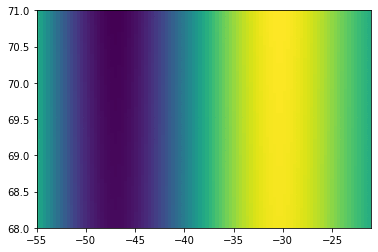

In [7]:
plt.pcolormesh(lons, lats, z)

In [10]:
area_id = 'EPSG:4326'
description = 'Lat-Long Grid'
proj_id = 'WGS 84'
proj_string = 'EPSG:4326'
width = 1000
height = 1000
area_extent = (-60, 65, -15, 75)
area_def = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)
print(area_def)

Area ID: EPSG:4326
Description: Lat-Long Grid
Projection ID: WGS 84
Projection: {'EPSG': '4326'}
Number of columns: 1000
Number of rows: 1000
Area extent: (-60, 65, -15, 75)


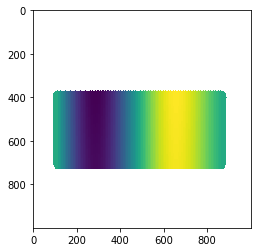

In [11]:
swath_def = geometry.SwathDefinition(lons=lonslons, lats=latslats)
result = kd_tree.resample_nearest(swath_def, z, area_def, radius_of_influence=34000, fill_value=np.nan)
plt.imshow(result)